<a href="https://colab.research.google.com/github/alexsanderthorne/formacaoMachineLearningSpecialist/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install seaborn
!pip install pandas
!pip install matplotlib

In [113]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from keras.initializers import Zeros
from sklearn.metrics import roc_curve, auc

In [116]:
logdir='log'

In [117]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [118]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [119]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [120]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 91s 47ms/step - loss: 0.1424 - accuracy: 0.9566 - val_loss: 0.0428 - val_accuracy: 0.9873
Epoch 2/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0366 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0338 - val_accuracy: 0.9904
Epoch 4/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0254 - accuracy: 0.9917 - val_loss: 0.0339 - val_accuracy: 0.9898
Epoch 5/5
1875/1875 [==============================] - 68s 37ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0348 - val_accuracy: 0.9893


In [121]:
if not isinstance(model, Sequential):
    raise TypeError("Model must be a Sequential model.")

y_true=test_labels
y_pred = np.argmax(model.predict(test_images), axis=1)


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7a317a7e2d40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7a317a7e2d40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 4s 13ms/step


In [122]:
classes=[0,1,2,3,4,5,6,7,8,9]

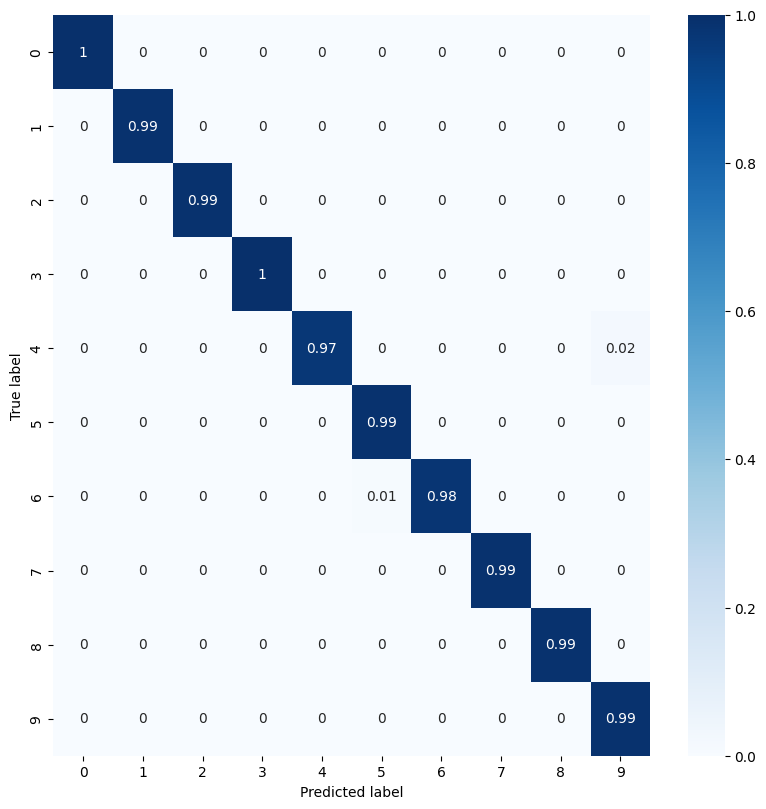

In [123]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [124]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [125]:
file_writer = tf.summary.create_file_writer(logdir + '/cm')

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred = model1.predict_classes(test_images)

  con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=test_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  buf = io.BytesIO()
  plt.savefig(buf, format='png')

  plt.close(figure)
  buf.seek(0)
  image = tf.image.decode_png(buf.getvalue(), channels=4)

  image = tf.expand_dims(image, 0)

  # Log the confusion matrix as an image summary.
  with file_writer.as_default():
    tf.summary.image("Confusion Matrix", image, step=epoch)


logdir='logs/images'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

#cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [126]:
model1.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=0,
    #callbacks=[tensorboard_callback, cm_callback],
    validation_data=(test_images, test_labels),
)

In [146]:
#métricas para avaliação de modelos de classificação de dados
def accuracy(conf_matrix):
    return np.trace(conf_matrix) / np.sum(conf_matrix)

def recall(conf_matrix):
    VP = conf_matrix[1, 1]
    FN = conf_matrix[1, 0]
    return VP / (VP + FN)

def specificity(conf_matrix):
    VN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    return VN / (VN + FP)

def precision(conf_matrix):
    VP = conf_matrix[1, 1]
    FP = conf_matrix[0, 1]
    return VP / (VP + FP)

def f_score(conf_matrix):
    prec = precision(conf_matrix)
    rec = recall(conf_matrix)
    return 2 * (prec * rec) / (prec + rec)


In [151]:
metrics = {
    'Accuracy': accuracy(con_mat),
    'Recall': recall(con_mat),
    'Specificity': specificity(con_mat),
    'Precision': precision(con_mat),
    'F-score': f_score(con_mat)
}

for metric, value in metrics.items():
    print(f'{metric}: {value}')


Accuracy: 0.9893
Recall: 0.9955516014234875
Specificity: 1.0
Precision: 1.0
F-score: 0.9977708426214891


In [152]:
y_true_binary = binarize(y_true.reshape(-1, 1))

In [154]:
y_true_binary = y_true_binary[:len(y_pred_prob)]

y_pred_prob = y_pred_prob[:len(y_true_binary)]

# Check the number of samples in y_true_binary and y_pred_prob
print(f"Number of samples in y_true_binary: {len(y_true_binary)}")
print(f"Number of samples in y_pred_prob: {len(y_pred_prob)}")

Number of samples in y_true_binary: 10
Number of samples in y_pred_prob: 10


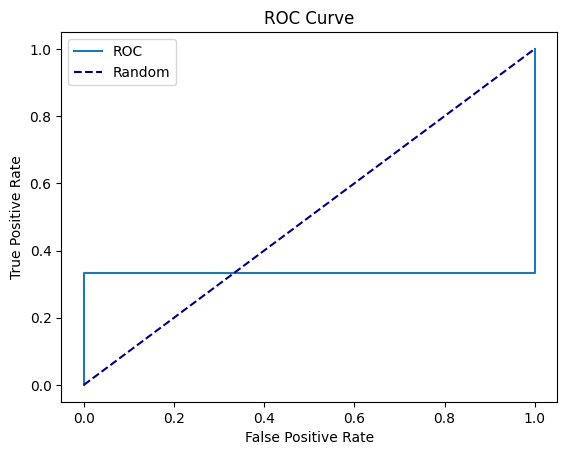

In [155]:
# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_true_binary, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()